In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\user\Desktop\Research\highTea2.csv")
print(df.head())

       Date   Price  Dollar rate  Crude oil  Production
0  1/1/2020  535.86       181.43   11181.53     5084836
1  1/2/2020  577.70       181.58    9687.29     4452424
2  1/3/2020  560.10       184.81    5950.88     3355617
3  1/4/2020  655.92       191.67    4032.73     4011551
4  1/5/2020  645.41       187.38    5636.39     6713225


In [5]:
train_dates = pd.to_datetime(df['Date'])
train_dates.tail

<bound method NDFrame.tail of 0     2020-01-01
1     2020-01-02
2     2020-01-03
3     2020-01-04
4     2020-01-05
         ...    
103   2012-01-08
104   2012-01-09
105   2012-01-10
106   2012-01-11
107   2012-01-12
Name: Date, Length: 108, dtype: datetime64[ns]>

In [6]:
cols = list(df)[1:6]



In [8]:
df_for_training = df[cols].astype(float)
df_for_training.head

<bound method NDFrame.head of       Price  Dollar rate  Crude oil  Production
0    535.86       181.43   11181.53   5084836.0
1    577.70       181.58    9687.29   4452424.0
2    560.10       184.81    5950.88   3355617.0
3    655.92       191.67    4032.73   4011551.0
4    645.41       187.38    5636.39   6713225.0
..      ...          ...        ...         ...
103  421.06       132.10   13903.10   5110707.0
104  417.31       131.80   14003.22   4754479.0
105  420.43       129.10   13343.41   5794067.0
106  425.99       130.30   13186.94   7142305.0
107  440.84       128.30   13006.18   5908086.0

[108 rows x 4 columns]>

In [21]:
# scaler = StandardScaler()
# scaler = scaler.fit(df_for_training)
# df_for_training_scaled = scaler.transform(df_for_training)
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler()
df_for_training_scaled=Scaler.fit_transform(df_for_training)


In [22]:
trainX = []
trainY = []

In [23]:
n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 6

In [24]:
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])


In [25]:
trainX, trainY = np.array(trainX), np.array(trainY)

In [26]:
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))


trainX shape == (102, 6, 4).
trainY shape == (102, 1).


In [29]:
trainY

array([[0.61544765],
       [0.73289833],
       [0.68312595],
       [0.81793627],
       [0.89793627],
       [0.92828528],
       [0.7369651 ],
       [0.74904401],
       [0.72889226],
       [0.63757208],
       [0.52764795],
       [0.38743551],
       [0.35875569],
       [0.3753566 ],
       [0.39350531],
       [0.45323217],
       [0.63708649],
       [0.63550835],
       [0.85705615],
       [0.97432473],
       [0.86388467],
       [0.71050076],
       [0.65347496],
       [0.51010622],
       [0.59924127],
       [0.76509863],
       [0.73359636],
       [0.85326252],
       [0.68546282],
       [0.71144158],
       [0.26907436],
       [0.83019727],
       [0.92245827],
       [0.88673748],
       [0.69359636],
       [0.6076176 ],
       [0.69790592],
       [0.87742033],
       [0.98588771],
       [1.        ],
       [0.96965099],
       [0.82549317],
       [0.24555387],
       [0.28191199],
       [0.27827011],
       [0.29796662],
       [0.28118361],
       [0.183

In [30]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 6, 64)             17664     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 30,113
Trainable params: 30,113
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
6/6 [==============================] - 3s 122ms/step - loss: 0.0033 - val_loss: 0.0437
Epoch 2/10
6/6 [==============================] - 0s 14ms/step - loss: 0.0034 - val_loss: 0.0418
Epoch 3/10
6/6 [==============================] - 0s 15ms/step - loss: 0.0033 - val_loss: 0.0393
Epoch 4/10
6/6 [==============================] - 0s 14ms/step - loss: 0.0034 - val_loss: 0.0375
Epoch 5/10
6/6 [==============================] - 0s 15ms/step - loss: 0.0030 - val_loss: 0.0362
Epoch 6/10
6/6 [==============================] - 0s 14ms/step - loss: 0.0029 - val_loss: 0.0356
Epoch 7/10
6/6 [==============================] - 0s 15ms/step - loss: 0.0030 - val_loss: 0.0367
Epoch 8/10
6/6 [==============================] - 0s 15ms/step - loss: 0.0037 - val_loss: 0.0381
Epoch 9/10
6/6 [==============================] - 0s 14ms/step - loss: 0.0033 - val_loss: 0.0392
Epoch 10/10
6/6 [==============================] - 0s 15ms/step - loss: 0.0028 - val_loss: 0.0402


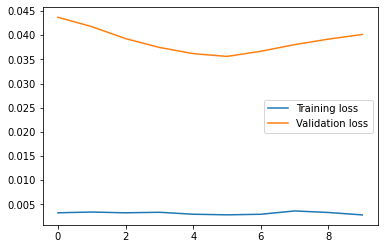

In [35]:
history = model.fit(trainX, trainY, epochs=10, batch_size=16, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [37]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
n_past = 16
n_days_for_prediction=12  #let us predict past 15 days

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()
print(predict_period_dates)

[Timestamp('2013-01-09 00:00:00', freq='C'), Timestamp('2013-01-10 00:00:00', freq='C'), Timestamp('2013-01-11 00:00:00', freq='C'), Timestamp('2013-01-14 00:00:00', freq='C'), Timestamp('2013-01-15 00:00:00', freq='C'), Timestamp('2013-01-16 00:00:00', freq='C'), Timestamp('2013-01-17 00:00:00', freq='C'), Timestamp('2013-01-18 00:00:00', freq='C'), Timestamp('2013-01-22 00:00:00', freq='C'), Timestamp('2013-01-23 00:00:00', freq='C'), Timestamp('2013-01-24 00:00:00', freq='C'), Timestamp('2013-01-25 00:00:00', freq='C')]


In [40]:
prediction = model.predict(trainX[-n_days_for_prediction:]
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

SyntaxError: invalid syntax (Temp/ipykernel_8068/1730246871.py, line 2)

In [43]:
n_future=12
forecast_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq='1m').tolist()
forecast=model.predict(trainX[-n_future:])

In [45]:
forecast_copies = np.repeat(forecast, df_for_training.shape[1], axis=-1)
y_pred_future = Scaler.inverse_transform(forecast_copies)[:,0]
y_pred_future

array([332.41626, 441.39764, 447.0362 , 445.47064, 431.76642, 449.7245 ,
       365.07446, 393.408  , 428.35944, 442.84247, 448.11316, 449.40247],
      dtype=float32)

C:\Users\user\AppData\Local\Temp/ipykernel_8068/635133410.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['Date'])
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and pa

<AxesSubplot:xlabel='Date', ylabel='Price'>

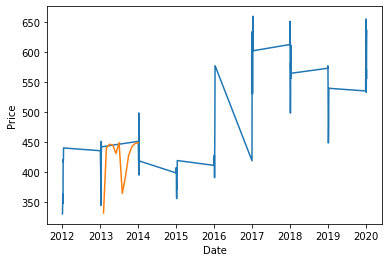

In [54]:
forecast_dates = []
for time_i in forecast_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Price':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


original = df[['Date', 'Price']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2010-1-1']

sns.lineplot(original['Date'], original['Price'])
sns.lineplot(df_forecast['Date'], df_forecast['Price'])

In [47]:
df_forecast

,Date,Price
0,2013-01-31,332.416260
1,2013-02-28,441.397644
2,2013-03-31,447.036194
3,2013-04-30,445.470642
4,2013-05-31,431.766418
5,2013-06-30,449.724487
6,2013-07-31,365.074463
7,2013-08-31,393.407990
8,2013-09-30,428.359436
9,2013-10-31,442.842468


In [52]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(trainX, trainY))
print('Test RMSE: %.3f' % rmse)

ValueError: Found array with dim 3. Estimator expected <= 2.

In [ ]:
n_future=12
forecast_period_dates=